# Lab 4



In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import stats, binom

# Exercise 1

Man erstelle das Histogramm der relativen Haufigkeiten fur 1000 zufallige Werte von X. Auf demselben Bild zeichne man auch die Balken fur die theoretischen Wahrscheinlichkeiten.

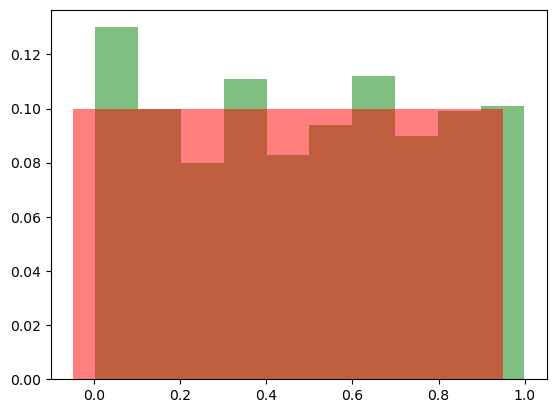

In [5]:
X = np.random.rand(1000)

# print(X)

rel_freq, bins = np.histogram(X, bins=10, density=True)

plt.hist(X, bins, weights=np.ones(len(X)) / len(X), alpha=0.5, color='g')

theoretical_probability = np.ones(10) / 10

plt.bar(bins[:-1], theoretical_probability, width=np.diff(bins), alpha=0.5, color='r')

plt.show()


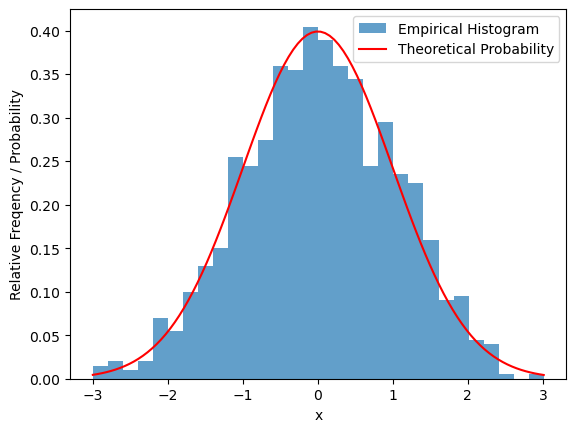

In [8]:
random_values = np.random.normal(size=1000)

plt.hist(random_values, bins=30, density=True, alpha=0.7, label='Empirical Histogram')

x = np.linspace(min(random_values), max(random_values), 100)

theoretical_probability = 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

plt.plot(x, theoretical_probability, label='Theoretical Probability', color='red')
plt.xlabel('x')
plt.ylabel('Relative Freqency / Probability')
plt.legend()

plt.show()

# Exercise 2

 UberdieZufallsgro ̈ßeX=AnzahlvonFehlernindenonlineArtikelneinerbestimmtenZeitungistbekannt: in 25% der Artikeln sind keine Tippfehler, in 35% der Artikel ist ein Tippfehler, in 25% der Artikel sind zwei, in 10% drei und auf dem Rest vier Tippfehler.
 - Man generiere zufa ̈llige Werte fu ̈r X.
 - Man scha ̈tze anhand der Simulationen die Wahrscheinlichkeit, dass ho ̈chstens 1 Tippfehler in einem zufa ̈llig gewa ̈hlten Artikel auftaucht.
 - Wie viele Tippfehler sind durchschnittlich (im Mittel) in einem online Artikel dieser Zeitung zu erwarten, d.h. man verlangt die Scha ̈tzung von dem Erwartungswert E(X). Man berechne den theoretischen Erwartungswert.

In [11]:
probabilities = [0.25, 0.35, 0.25, 0.1, 0.05]

print(probabilities)

num_simulations = 10000

simulated_value = np.random.choice([0, 1, 2, 3, 4], size=num_simulations, p=probabilities)

probabilityAtMostOneError = np.mean(simulated_value <= 1)

simulatedExpectedValue = np.mean(simulated_value)

theoretical_probability = np.dot(np.array(5), probabilities)

print('Simulated Probability of at most one error: ', probabilityAtMostOneError)
print('Simulated Expected Value: ', simulatedExpectedValue)
print('Theoretical Probability of at most one error: ', theoretical_probability)

[0.25, 0.35, 0.25, 0.1, 0.05]
Simulated Probability of at most one error:  0.5994
Simulated Expected Value:  1.3484
Theoretical Probability of at most one error:  [1.25 1.75 1.25 0.5  0.25]


# Exercise 3

Gegeben sind n, N ∈ N∗, p ∈ (0, 1).Die Zufallsgro ̈ße X hat binomiale Verteilung X ∼ Bino(n, p), wenn P(X=k)=Cnkpk(1−p)n−k, k∈{0,...,n}.
 - Man generiere N (z.B. 500,1000,...) Werte der Zufallsgro ̈ße X mit binomialer Verteilung X ∼ Bino(n, p) mit n=8,p=0.5.Manbenutzehierfu ̈rscipy.stats.binom.rvs.
 - Man erstelle das Histogramm der relativen Ha ̈ufigkeiten der zufa ̈lligen Werten von X. Auf demselben Bild zeichne man auch die Balken fu ̈r die theoretischen Wahrscheinlichkeiten, fu ̈r diese benutze man scipy.stats.binom.pmf.

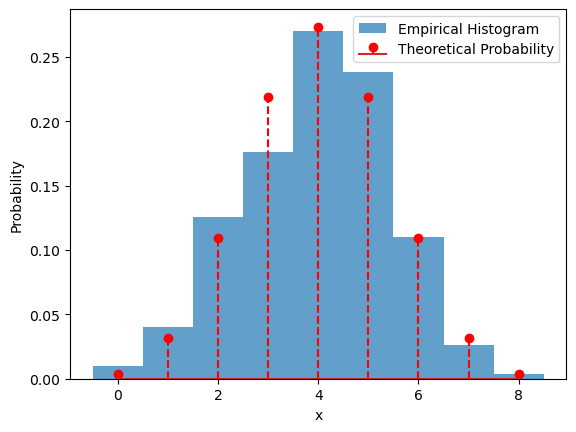

In [14]:
n = 8
p=0.5
N=500

random_values = binom.rvs(n=n, p=p, size=N)

plt.hist(random_values, bins=np.arange(-0.5, n+1.5, 1), density=True, alpha=0.7, label='Empirical Histogram')

x = np.arange(0, n+1)
theoretical_probability = binom.pmf(x, n=n, p=p)

plt.stem(x, theoretical_probability, label='Theoretical Probability', linefmt='r--', markerfmt='ro')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Exercise 4

In einem Computerpool sind 7 Rechner. Die Wahrscheinlichkeit, dass ein neuer Virus einen Rechner angreift ist 0.4, unabha ̈ngig von anderen Rechnern.
 Welche ist die Wahrscheinlichkeit, dass der Virus:
    - a) hochstens 3 Rechner;
    - b) mindestens 4 Rechner;
    - c) genau 4 Rechner angreift?
Man gebe die Antworten anhand Simulationen (binom.rvs) und vergleiche diese mit den theoretischen Wahrschein- lichkeiten (hierfu ̈r benutze man binom.cdf, binom.pmf).

a) Simulated Probability: 0.7134, Theoretical Probability: 0.710208
b) Simulated Probability: 0.2866, Theoretical Probability: 0.28979200000000005
c) Simulated Probability: 0.1915, Theoretical Probability: 0.19353599999999996


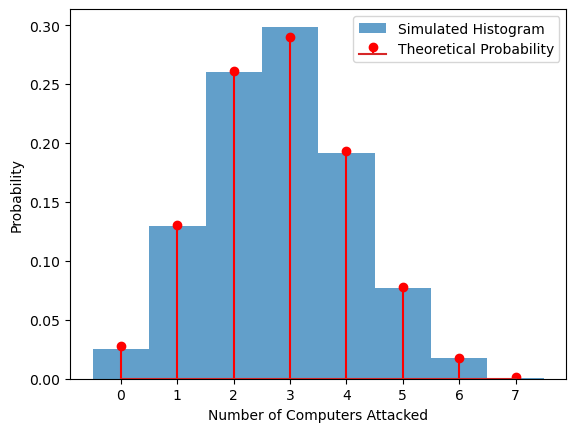

In [16]:
n_computers = 7
p_virus_attack = 0.4

N = 10000
simulated_values = binom.rvs(n=n_computers, p=p_virus_attack, size=N)

simulated_probability_a = np.mean(simulated_values <= 3)
theoretical_probability_a = binom.cdf(3, n=n_computers, p=p_virus_attack)

simulated_probability_b = np.mean(simulated_values >= 4)
theoretical_probability_b = 1 - binom.cdf(3, n=n_computers, p=p_virus_attack)

simulated_probability_c = np.mean(simulated_values == 4)
theoretical_probability_c = binom.pmf(4, n=n_computers, p=p_virus_attack)

print(f"a) Simulated Probability: {simulated_probability_a}, Theoretical Probability: {theoretical_probability_a}")
print(f"b) Simulated Probability: {simulated_probability_b}, Theoretical Probability: {theoretical_probability_b}")
print(f"c) Simulated Probability: {simulated_probability_c}, Theoretical Probability: {theoretical_probability_c}")

plt.hist(simulated_values, bins=np.arange(-0.5, n_computers+1.5, 1), density=True, alpha=0.7, label='Simulated Histogram')

x = np.arange(0, n_computers+1)
theoretical_probability = binom.pmf(x, n=n_computers, p=p_virus_attack)
plt.stem(x, theoretical_probability, label='Theoretical Probability', linefmt='r-', markerfmt='ro')
plt.xlabel('Number of Computers Attacked')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Exercise 5

Ein Zufallsgenerator generiert Zufallszahlen fu ̈r die Verteilung Unid(5), d.h.

Sei X die Anzahl der generierten Zahlen, bevor die erste 5 auftaucht.
 - Man generiere N (z.B. 500,1000,...) zufa ̈llige Werte fu ̈r X und zeichne das Histogramm der relativen Ha ̈ufigkeiten.
 - Man scha ̈tze zusa ̈tzlich P(X ≤ 3), P(X > 3) und den Erwartungswert E(X).


Probability that X <= 3: 0.769
Probability that X > 3: 0.231
Expected Value of X: 2.453


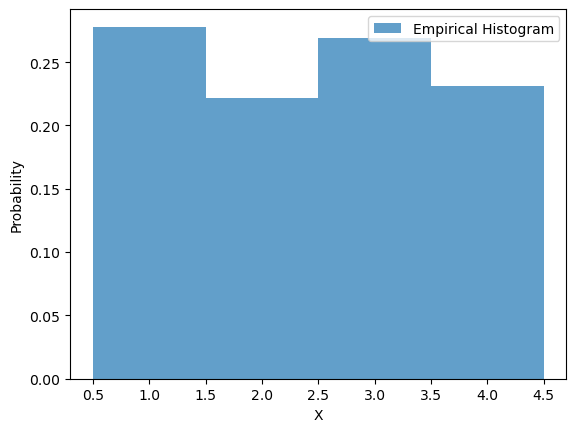

In [21]:
low = 1
high = 5

N = 1000

randomValues = np.random.randint(low=low, high=high, size=N)

plt.hist(randomValues, bins=np.arange(low-0.5, high+0.5, 1), density=True, alpha=0.7, label='Empirical Histogram')

probabilityXleq3 = np.mean(randomValues <= 3)
probabilityXgt3 = np.mean(randomValues > 3)
expectedValueX = np.mean(randomValues)

print(f"Probability that X <= 3: {probabilityXleq3}")
print(f"Probability that X > 3: {probabilityXgt3}")
print(f"Expected Value of X: {expectedValueX}")

plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Exercise 6

Eine Urne enthalt 5 Kugeln mit der Ziffer 1, 6 Kugeln mit der Ziffer 2, 9 Kugeln mit der Ziffer 3. Aus der Urne werden 2 Kugeln ohne Zurucklegen gezogen. X sei die Summe der beiden Kugeln.
 - Man generiere N (z.B. 500,1000,...) zufallige Werte fur X und zeichne das Histogramm der relativen Ha ̈ufigkeiten. Auf demselben Bild zeichne man auch die Balken fur die theoretischen Wahrscheinlichkeiten.
 - Man scha ̈tze zusatzlich den Erwartungswert E(X) und berechne den theoretischen Erwartungswert von X.

[1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3]
Expected Value of X: 4.3894
Theoretical Expected Value of X: 1.5


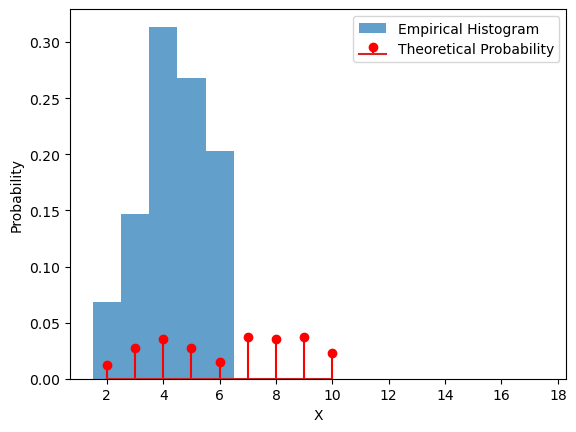

In [26]:
kuglenZiffer1 = 5
kuglenZiffer2 = 6
kuglenZiffer3 = 9

N = 10000

sample_space = np.concatenate([np.full(kuglenZiffer1, 1),
                               np.full(kuglenZiffer2, 2),
                               np.full(kuglenZiffer3, 3)
                               ])

print(sample_space)

randomValues = np.random.choice(sample_space, size=(N, 2)).sum(axis=1)
plt.hist(randomValues, bins=np.arange(1.5, 18.5, 1), density=True, alpha=0.7, label='Empirical Histogram')

theoretical_probability = [np.sum(np.isin(sample_space, [i, j])) / len(sample_space)**2 for i in range(1, 4) for j in range(1, 4)]

plt.stem(range(2, 11), theoretical_probability, label='Theoretical Probability', linefmt='r-', markerfmt='ro')

expectedValueX = np.mean(randomValues)
theoreticalExpectedValue = np.sum([i * j for i in range(1, 4) for j in theoretical_probability])



print(f"Expected Value of X: {expectedValueX}")
print(f"Theoretical Expected Value of X: {theoreticalExpectedValue}")

plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.show()
